In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


**Import Libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Open training file**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/My Drive/predictive_analysis_project/COLAB file/train.csv")

In [5]:
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              20580 non-null  int64  
 1   Province_State  8750 non-null   object 
 2   Country_Region  20580 non-null  object 
 3   Date            20580 non-null  object 
 4   ConfirmedCases  20580 non-null  float64
 5   Fatalities      20580 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 964.8+ KB


In [7]:
print(df[df["Province_State"]=="New York"])

          Id Province_State  ... ConfirmedCases Fatalities
17990  25701       New York  ...            0.0        0.0
17991  25702       New York  ...            0.0        0.0
17992  25703       New York  ...            0.0        0.0
17993  25704       New York  ...            0.0        0.0
17994  25705       New York  ...            0.0        0.0
...      ...            ...  ...            ...        ...
18055  25766       New York  ...        44876.0      527.0
18056  25767       New York  ...        52410.0      728.0
18057  25768       New York  ...        59648.0      965.0
18058  25769       New York  ...        66663.0     1218.0
18059  25770       New York  ...        75833.0     1550.0

[70 rows x 6 columns]


**Add new column for time named as days**

In [20]:
df["days"]=[x for x in range(1,307) for x in range(1, 71)]
#df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))


ValueError: ignored

In [ ]:
df.info()

**Filter New York, for forecasting New York**

In [ ]:
df=df[df["Province_State"]=="New York"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 17990 to 18059
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              70 non-null     int64  
 1   Province_State  70 non-null     object 
 2   Country_Region  70 non-null     object 
 3   Date            70 non-null     object 
 4   ConfirmedCases  70 non-null     float64
 5   Fatalities      70 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.8+ KB


In [ ]:
df.head()
x=df.iloc[:,1]
time=df.iloc[:,6]
y=df.iloc[:,4]
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")
time.shape

IndexError: ignored

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(time, series)
plt.title("Confirmed Cases in New York")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")

NameError: ignored

<Figure size 720x432 with 0 Axes>

**Split the training Set into training and Validation. Training set is until 70 days last 4 days will be predicted. The last 4 days will serve to select which method is the best for forecasting.**

In [ ]:
time=np.array(time)
series=np.array(series)
split_time = 71
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
window_size = 2
batch_size = 3
shuffle_buffer_size = 71

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer_size)

In [ ]:
print(x_train)

[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.   173.   220.
   328.   421.   525.   732.   967.  1706.  2495.  5365.  8310. 11710.
 15800. 20884. 25681. 30841. 37877. 44876. 52410. 59648. 66663. 75833.
 83948.]


**First Method is single neuron regression**

In [ ]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss=tf.keras.losses.Huber(), optimizer="adam")
model.fit(dataset,epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 27ms/step - loss: 5063.2116
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 4925.7757
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 4780.9440
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 4638.8662
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 4505.9121
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 4357.5527
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 4191.5246
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 4041.1087
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 3899.6845
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 3725.0929
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 3578.3813
Epoch 12/100
23/23 [==============================] - 0s 2ms/step - loss: 3433.2571


[array([[98848.13]], dtype=float32), array([[109288.99]], dtype=float32), array([[120768.62]], dtype=float32)]
[array([[98848.13]], dtype=float32), array([[109288.99]], dtype=float32), array([[120768.62]], dtype=float32)]


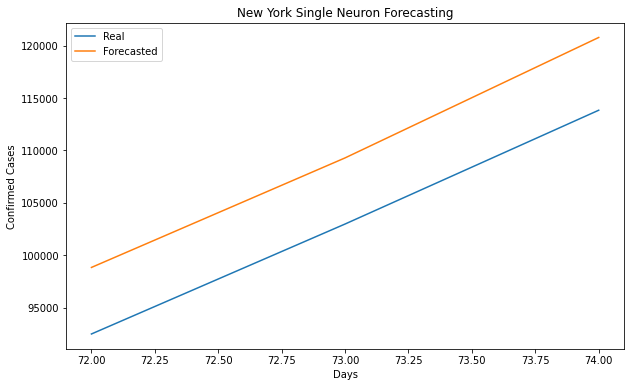

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
  

forecast = forecast[split_time-window_size:]
print(forecast)
results = np.array(forecast)[:, 0, 0]
print(forecast)

plt.figure(figsize=(10, 6))

line1=plt.plot( time_valid, x_valid,label="Real")
line2=plt.plot(time_valid, results,label="Forecasted")
plt.title("New York Single Neuron Forecasting")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")
plt.legend()

**Simple Neural Network forecasting**

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.Huber(), optimizer="adam")
model.fit(dataset,epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 18ms/step - loss: 5949.5868
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 3041.9196
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 583.9526
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 680.7228
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 682.6643
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 907.2472
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 609.9485
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 619.2640
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 562.7944
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 556.2066
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 610.8125
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 552.8899
Epoch 13/1

[array([[96229.164]], dtype=float32), array([[105710.984]], dtype=float32), array([[118501.7]], dtype=float32)]


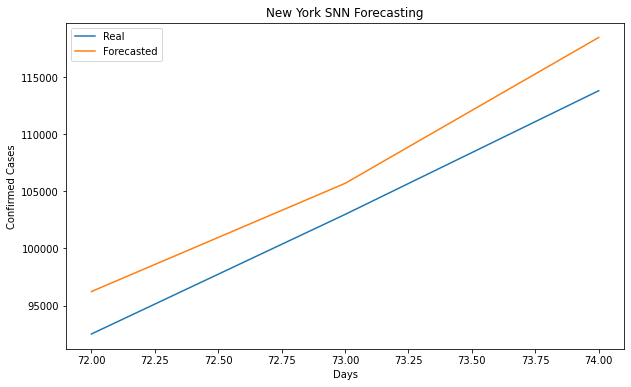

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
  

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
print(forecast)

plt.figure(figsize=(10, 6))
plt.title("New York SNN Forecasting")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")

plt.plot( time_valid, x_valid,label="Real")
plt.plot(time_valid, results,label="Forecasted")
plt.legend()

**Bidirectional LSTM forecasting**

In [ ]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True,activation="relu")),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation="relu")),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss=tf.keras.losses.Huber(), optimizer="adam",metrics=["mae"])
history = model.fit(dataset,epochs=1000)

Epoch 1/1000
23/23 [==============================] - 4s 185ms/step - loss: 2758.5673 - mae: 2758.8120
Epoch 2/1000
23/23 [==============================] - 0s 10ms/step - loss: 6662.9802 - mae: 6663.2368
Epoch 3/1000
23/23 [==============================] - 0s 10ms/step - loss: 8028.4698 - mae: 8028.7905
Epoch 4/1000
23/23 [==============================] - 0s 10ms/step - loss: 2410.2782 - mae: 2410.5190
Epoch 5/1000
23/23 [==============================] - 0s 10ms/step - loss: 2276.6622 - mae: 2276.8799
Epoch 6/1000
23/23 [==============================] - 0s 10ms/step - loss: 3064.1573 - mae: 3064.4114
Epoch 7/1000
23/23 [==============================] - 0s 10ms/step - loss: 2208.7029 - mae: 2209.0100
Epoch 8/1000
23/23 [==============================] - 0s 10ms/step - loss: 1244.7829 - mae: 1245.0712
Epoch 9/1000
23/23 [==============================] - 0s 10ms/step - loss: 1869.9228 - mae: 1870.1862
Epoch 10/1000
23/23 [==============================] - 0s 10ms/step - loss: 6287.

23/23 [==============================] - 0s 10ms/step - loss: 558.6949 - mae: 559.0461
Epoch 162/1000
23/23 [==============================] - 0s 10ms/step - loss: 772.3086 - mae: 772.6838
Epoch 163/1000
23/23 [==============================] - 0s 10ms/step - loss: 642.7907 - mae: 643.0375
Epoch 164/1000
23/23 [==============================] - 0s 10ms/step - loss: 486.5617 - mae: 486.8368
Epoch 165/1000
23/23 [==============================] - 0s 10ms/step - loss: 500.7371 - mae: 501.1322
Epoch 166/1000
23/23 [==============================] - 0s 10ms/step - loss: 657.3461 - mae: 657.7460
Epoch 167/1000
23/23 [==============================] - 0s 10ms/step - loss: 667.3575 - mae: 667.6348
Epoch 168/1000
23/23 [==============================] - 0s 10ms/step - loss: 558.6197 - mae: 558.9543
Epoch 169/1000
23/23 [==============================] - 0s 10ms/step - loss: 554.1085 - mae: 554.4725
Epoch 170/1000
23/23 [==============================] - 0s 10ms/step - loss: 570.1765 - mae: 570.

23/23 [==============================] - 0s 10ms/step - loss: 1588.2649 - mae: 1588.6309
Epoch 322/1000
23/23 [==============================] - 0s 10ms/step - loss: 685.6468 - mae: 686.0535
Epoch 323/1000
23/23 [==============================] - 0s 10ms/step - loss: 657.2735 - mae: 657.6071
Epoch 324/1000
23/23 [==============================] - 0s 10ms/step - loss: 13046.4258 - mae: 13046.8848
Epoch 325/1000
23/23 [==============================] - 0s 10ms/step - loss: 1613.0621 - mae: 1613.4918
Epoch 326/1000
23/23 [==============================] - 0s 10ms/step - loss: 413.4207 - mae: 413.8117
Epoch 327/1000
23/23 [==============================] - 0s 10ms/step - loss: 742.9122 - mae: 743.2758
Epoch 328/1000
23/23 [==============================] - 0s 10ms/step - loss: 391.8643 - mae: 392.1865
Epoch 329/1000
23/23 [==============================] - 0s 10ms/step - loss: 493.9868 - mae: 494.3816
Epoch 330/1000
23/23 [==============================] - 0s 10ms/step - loss: 519.0728 - m

23/23 [==============================] - 0s 10ms/step - loss: 1627.3249 - mae: 1627.6001
Epoch 402/1000
23/23 [==============================] - 0s 10ms/step - loss: 805.8637 - mae: 806.1428
Epoch 403/1000
23/23 [==============================] - 0s 10ms/step - loss: 2293.0348 - mae: 2293.3315
Epoch 404/1000
23/23 [==============================] - 0s 10ms/step - loss: 2700.5171 - mae: 2700.8481
Epoch 405/1000
23/23 [==============================] - 0s 10ms/step - loss: 720.6830 - mae: 721.1271
Epoch 406/1000
23/23 [==============================] - 0s 10ms/step - loss: 987.6152 - mae: 988.0381
Epoch 407/1000
23/23 [==============================] - 0s 10ms/step - loss: 2439.7725 - mae: 2440.1169
Epoch 408/1000
23/23 [==============================] - 0s 10ms/step - loss: 790.0026 - mae: 790.2734
Epoch 409/1000
23/23 [==============================] - 0s 10ms/step - loss: 1014.8423 - mae: 1015.2698
Epoch 410/1000
23/23 [==============================] - 0s 10ms/step - loss: 632.3232 -

23/23 [==============================] - 0s 10ms/step - loss: 605.6715 - mae: 606.0679
Epoch 482/1000
23/23 [==============================] - 0s 10ms/step - loss: 612.3120 - mae: 612.7452
Epoch 483/1000
23/23 [==============================] - 0s 10ms/step - loss: 448.3069 - mae: 448.7228
Epoch 484/1000
23/23 [==============================] - 0s 10ms/step - loss: 1056.5799 - mae: 1056.9336
Epoch 485/1000
23/23 [==============================] - 0s 11ms/step - loss: 482.5986 - mae: 482.9132
Epoch 486/1000
23/23 [==============================] - 0s 10ms/step - loss: 490.4464 - mae: 490.8008
Epoch 487/1000
23/23 [==============================] - 0s 10ms/step - loss: 607.2762 - mae: 607.6069
Epoch 488/1000
23/23 [==============================] - 0s 12ms/step - loss: 473.7714 - mae: 474.0653
Epoch 489/1000
23/23 [==============================] - 0s 13ms/step - loss: 2202.6783 - mae: 2203.0120
Epoch 490/1000
23/23 [==============================] - 0s 14ms/step - loss: 482.9723 - mae: 

23/23 [==============================] - 0s 10ms/step - loss: 585.0996 - mae: 585.5970
Epoch 642/1000
23/23 [==============================] - 0s 10ms/step - loss: 509.8672 - mae: 510.3180
Epoch 643/1000
23/23 [==============================] - 0s 10ms/step - loss: 363.6921 - mae: 364.0674
Epoch 644/1000
23/23 [==============================] - 0s 10ms/step - loss: 452.8578 - mae: 453.2663
Epoch 645/1000
23/23 [==============================] - 0s 10ms/step - loss: 422.2623 - mae: 422.5657
Epoch 646/1000
23/23 [==============================] - 0s 10ms/step - loss: 628.4030 - mae: 628.7899
Epoch 647/1000
23/23 [==============================] - 0s 10ms/step - loss: 646.2293 - mae: 646.6339
Epoch 648/1000
23/23 [==============================] - 0s 10ms/step - loss: 522.1477 - mae: 522.5201
Epoch 649/1000
23/23 [==============================] - 0s 10ms/step - loss: 404.6724 - mae: 405.0341
Epoch 650/1000
23/23 [==============================] - 0s 10ms/step - loss: 312.6312 - mae: 313.

23/23 [==============================] - 0s 10ms/step - loss: 837.1708 - mae: 837.5793
Epoch 802/1000
23/23 [==============================] - 0s 10ms/step - loss: 515.6376 - mae: 516.0405
Epoch 803/1000
23/23 [==============================] - 0s 10ms/step - loss: 507.8300 - mae: 508.2363
Epoch 804/1000
23/23 [==============================] - 0s 10ms/step - loss: 572.4325 - mae: 572.6823
Epoch 805/1000
23/23 [==============================] - 0s 10ms/step - loss: 548.8989 - mae: 549.2110
Epoch 806/1000
23/23 [==============================] - 0s 10ms/step - loss: 437.6603 - mae: 437.9759
Epoch 807/1000
23/23 [==============================] - 0s 10ms/step - loss: 824.0676 - mae: 824.2871
Epoch 808/1000
23/23 [==============================] - 0s 10ms/step - loss: 544.0449 - mae: 544.4063
Epoch 809/1000
23/23 [==============================] - 0s 10ms/step - loss: 576.4123 - mae: 576.7981
Epoch 810/1000
23/23 [==============================] - 0s 10ms/step - loss: 389.4250 - mae: 389.

23/23 [==============================] - 0s 10ms/step - loss: 381.2606 - mae: 381.5574
Epoch 962/1000
23/23 [==============================] - 0s 10ms/step - loss: 436.8892 - mae: 437.1602
Epoch 963/1000
23/23 [==============================] - 0s 10ms/step - loss: 499.2058 - mae: 499.4550
Epoch 964/1000
23/23 [==============================] - 0s 10ms/step - loss: 458.6246 - mae: 459.0205
Epoch 965/1000
23/23 [==============================] - 0s 10ms/step - loss: 390.3544 - mae: 390.6973
Epoch 966/1000
23/23 [==============================] - 0s 10ms/step - loss: 358.6376 - mae: 358.9618
Epoch 967/1000
23/23 [==============================] - 0s 11ms/step - loss: 560.0362 - mae: 560.3973
Epoch 968/1000
23/23 [==============================] - 0s 10ms/step - loss: 987.1689 - mae: 987.4474
Epoch 969/1000
23/23 [==============================] - 0s 10ms/step - loss: 654.8820 - mae: 655.2330
Epoch 970/1000
23/23 [==============================] - 0s 10ms/step - loss: 518.2254 - mae: 518.

[array([[93645.92]], dtype=float32), array([[103254.82]], dtype=float32), array([[114686.586]], dtype=float32)]


Text(0.5, 0, 'Days')

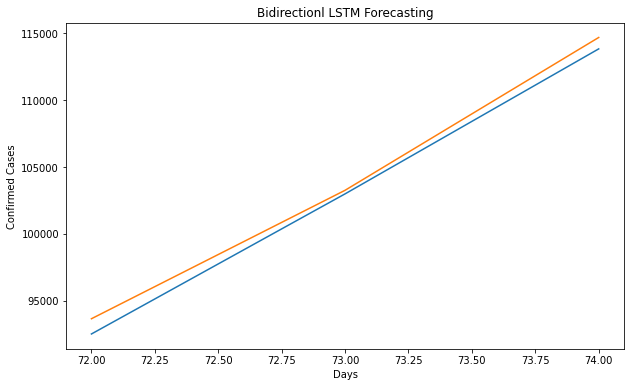

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]
print(forecast)

plt.figure(figsize=(10, 6))

plt.plot( time_valid, x_valid,label="Real")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")

**Bidirectional LSTM seems to give most accurate results on validation set. This neural network will be trained with full train set and then will be used to forecast on test set.**

In [ ]:
df1=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/test.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 4 columns):
ForecastId        13158 non-null int64
Province_State    5590 non-null object
Country_Region    13158 non-null object
Date              13158 non-null object
dtypes: int64(1), object(3)
memory usage: 411.3+ KB


In [ ]:
df1=df1[df1["Province_State"]=="New York"]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 11395 to 11437
Data columns (total 4 columns):
ForecastId        43 non-null int64
Province_State    43 non-null object
Country_Region    43 non-null object
Date              43 non-null object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [ ]:
df2=pd.DataFrame()

In [ ]:
df2["days_test"]=[x for x in range(1,85)]

In [ ]:
#df3=df.reset_index()
#df2=df2.reset_index()
df4 = [df3, df2]
df_test = pd.concat(df4, axis=1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
index             74 non-null float64
Id                74 non-null float64
Province_State    74 non-null object
Country_Region    74 non-null object
Date              74 non-null object
ConfirmedCases    74 non-null float64
Fatalities        74 non-null float64
days              74 non-null float64
days_test         84 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 6.0+ KB


In [ ]:
df_test.tail(20)

,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,days,days_test
64,19674.0,28420.0,New York,US,2020-03-26,37877.0,385.0,65.0,65
65,19675.0,28421.0,New York,US,2020-03-27,44876.0,527.0,66.0,66
66,19676.0,28422.0,New York,US,2020-03-28,52410.0,728.0,67.0,67
67,19677.0,28423.0,New York,US,2020-03-29,59648.0,965.0,68.0,68
68,19678.0,28424.0,New York,US,2020-03-30,66663.0,1218.0,69.0,69
69,19679.0,28425.0,New York,US,2020-03-31,75833.0,1550.0,70.0,70
70,19680.0,28426.0,New York,US,2020-04-01,83948.0,1941.0,71.0,71
71,19681.0,28427.0,New York,US,2020-04-02,92506.0,2373.0,72.0,72
72,19682.0,28428.0,New York,US,2020-04-03,102987.0,2935.0,73.0,73
73,19683.0,28429.0,New York,US,2020-04-04,113833.0,3565.0,74.0,74


In [ ]:
x=df_test.iloc[:,2]
time=df_test.iloc[:,8]
y=df_test.iloc[:,5]
time=time.to_numpy(dtype="float32")
series=y.to_numpy(dtype="float32")

In [ ]:
time=np.array(time)
series=np.array(series)
split_time = 72
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
window_size = 2
batch_size = 3
shuffle_buffer_size = 74

In [ ]:
print(series)

[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.      0.    173.    220.    328.    421.    525.    732.
    967.   1706.   2495.   5365.   8310.  11710.  15800.  20884.  25681.
  30841.  37877.  44876.  52410.  59648.  66663.  75833.  83948.  92506.
 102987. 113833.     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan]


0
[[1.0105848]]
1
[[1.0105848]]
2
[[1.0105848]]
3
[[1.0105848]]
4
[[1.0105848]]
5
[[1.0105848]]
6
[[1.0105848]]
7
[[1.0105848]]
8
[[1.0105848]]
9
[[1.0105848]]
10
[[1.0105848]]
11
[[1.0105848]]
12
[[1.0105848]]
13
[[1.0105848]]
14
[[1.0105848]]
15
[[1.0105848]]
16
[[1.0105848]]
17
[[1.0105848]]
18
[[1.0105848]]
19
[[1.0105848]]
20
[[1.0105848]]
21
[[1.0105848]]
22
[[1.0105848]]
23
[[1.0105848]]
24
[[1.0105848]]
25
[[1.0105848]]
26
[[1.0105848]]
27
[[1.0105848]]
28
[[1.0105848]]
29
[[1.0105848]]
30
[[1.0105848]]
31
[[1.0105848]]
32
[[1.0105848]]
33
[[1.0105848]]
34
[[1.0105848]]
35
[[1.0105848]]
36
[[1.0105848]]
37
[[1.0105848]]
38
[[1.0105848]]
39
[[1.0105848]]
40
[[1.0105848]]
41
[[1.0105848]]
42
[[1.0105848]]
43
[[1.0105848]]
44
[[1.0105848]]
45
[[1.0105848]]
46
[[1.0105848]]
47
[[217.502]]
48
[[480.834]]
49
[[607.03064]]
50
[[726.7166]]
51
[[850.27026]]
52
[[1061.7535]]
53
[[1333.7749]]
54
[[2086.8953]]
55
[[2953.863]]
56
[[5781.152]]
57
[[9061.145]]
58
[[12790.215]]
59
[[17251.14]]

79
[[267664.78]]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7300000e+02 2.2000000e+02
 3.2800000e+02 4.2100000e+02 5.2500000e+02 7.3200000e+02 9.6700000e+02
 1.7060000e+03 2.4950000e+03 5.3650000e+03 8.3100000e+03 1.1710000e+04
 1.5800000e+04 2.0884000e+04 2.5681000e+04 3.0841000e+04 3.7877000e+04
 4.4876000e+04 5.2410000e+04 5.9648000e+04 6.6663000e+04 7.5

Text(0.5, 0, 'Days')

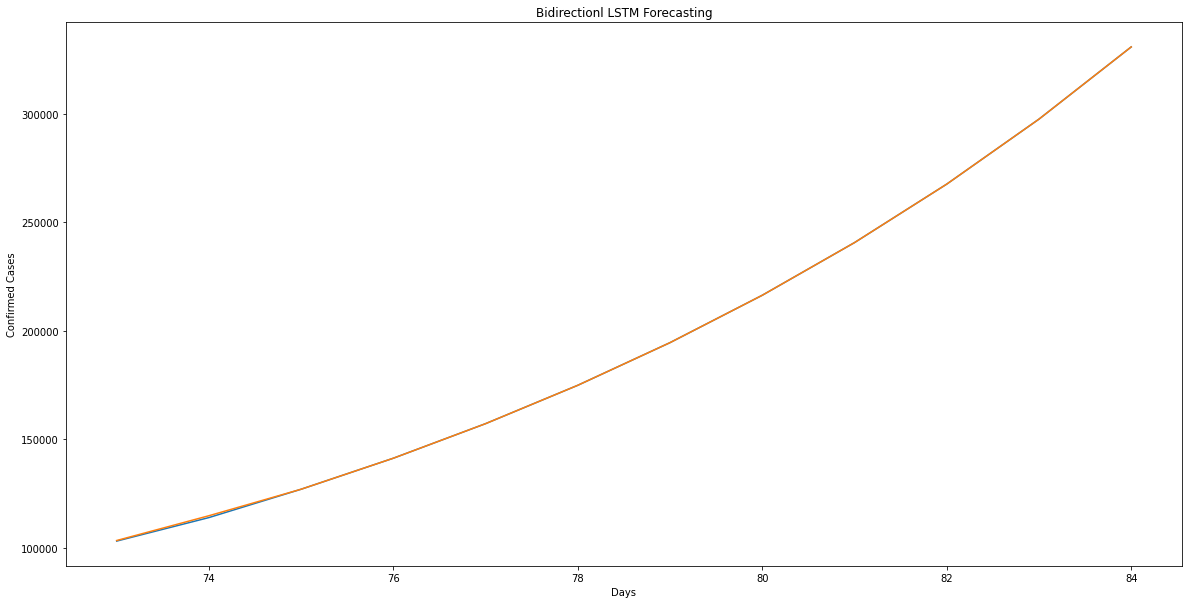

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
    print(time)
    z=model.predict(series[time:time + window_size][np.newaxis])
    print(z)
    if time >= 72:
        series[time+window_size]=z
        print(series)
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
 
  


forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(20, 10))

plt.plot( time_valid, x_valid,label="Real")
plt.plot(time_valid, results,label="Forecasted")
plt.title("Bidirectionl LSTM Forecasting")
plt.ylabel("Confirmed Cases")
plt.xlabel("Days")

In [ ]:
print(forecast)